<div align='center'><font size="6" color="#F39C12" style="Bold">SIIM-ISIC Melanoma Classification -EDA </font></div>
<hr>


<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#mel" role="tab" aria-controls="profile">What is Melanoma?<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#data" role="tab" aria-controls="messages">Studying the data And Exploratory Data Analysis<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#res" role="tab" aria-controls="settings">Resizing the Images<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#ext" role="tab" aria-controls="settings">Extract features from Images<span class="badge badge-primary badge-pill">5</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#sub" role="tab" aria-controls="settings">Train the model and predict the result<span class="badge badge-primary badge-pill">6</span></a>

    
## References
   

## <a id='mel'>What is Melanoma?</a>

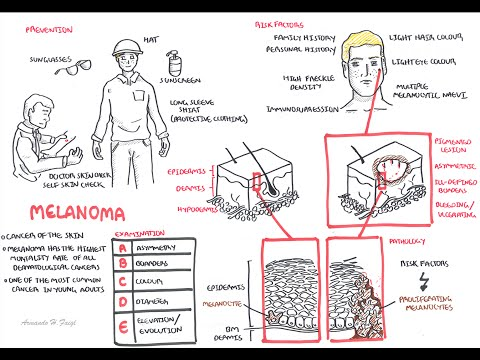

In [1]:
from IPython.display import YouTubeVideo,HTML
YouTubeVideo("mkYBxfKDyv0", width=800, height=500)


Skin cancer is the most prevalent type of cancer. Melanoma, specifically, is responsible for 75% of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.
https://www.kaggle.com/c/siim-isic-melanoma-classification

Melanoma is a skin cancer that arises from a skin cell called a melanocyte, which makes a the pigment (melanin) that gives your skin its color. Melanoma can appear in different ways, most commonly as a new spot on the skin or as an already existing mole that changes in color, size, or shape. While considered the most dangerous type of skin cancer because of its ability to rapidly spread throughout the body, melanoma is generally very treatable if found early.
https://www.verywellhealth.com/what-is-melanoma-514215

![](https://impactmelanoma.org/wp-content/uploads/2018/11/Standard-Infographic_0.jpg)
https://impactmelanoma.org/wp-content/uploads/2018/11/Standard-Infographic_0.jpg
 
 
The[ Society for Imaging Informatics in Medicine (SIIM)](https://siim.org/page/about_siim) is the leading healthcare professional organization for those interested in the current and future use of informatics in medical imaging. The society's mission is to advance medical imaging informatics across the enterprise through education, research, and innovation in a multi-disciplinary community. The [International Skin Imaging Collaboration or 
ISIC](https://siim.org/page/about_siim) Melanoma Project is an academia and industry partnership designed to facilitate the application of digital skin imaging to help reduce melanoma mortality

The overarching goal of the ISIC Melanoma Project is to support efforts to reduce melanoma-related deaths and unnecessary biopsies by improving the accuracy and efficiency of melanoma early detection since when recognized and treated in its earliest stages, melanoma is readily curable


## Objective

The objective of this competition is to identify melanoma in images of skin lesions. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.In particular, we need to use images within the same patient and determine which are likely to represent a melanoma. In other words, we need to create a model which should predict the probability whether the lesion in the image is malignantor benign.Value 0 denotes benign, and 1 indicates malignant.

## Dataset

The dataset which we are going to use are from following sources:
1. Kaggle SIIM Melanoma Classification Challange 
    https://www.kaggle.com/c/siim-isic-melanoma-classification
2. ISIC 2019 Melanoma Classification
    https://challenge2019.isic-archive.com/

The dataset consists of images in :
* DIOCOM format
* JPEG format in JPEG directory
* TFRecord format in tfrecords directory

Additionally, there is a metadata comprising of train, test and submission file in CSV format.

## Understanding the Evaluation Metric

For this particluar problem, our submissions will be evaluated using **area under the ROC curve**. An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

![](https://imgur.com/yNeAG4M.png)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

![](https://imgur.com/N3UOcBF.png)

source: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

# <a id='eda'>EDA</a>

## Step 1 : Import Necessary Libraries

In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

#plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#pydicom


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

## Step 2 : Reading Dataset

In [3]:
#defining Data PATH
# IMAGE_PATH = "down_siim-isic-melanoma-classification/"

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

#Training Data
print('Training data Shape: ', train_df.shape)
train_df.head(5)

Training data Shape:  (33126, 8)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
#Test Data
print('Training data Shape: ', test_df.shape)
test_df.head(5)

Training data Shape:  (10982, 5)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [5]:
train_df.groupby(['benign_malignant','sex']).count()['image_name'].to_frame()

image_name
benign_malignant sex               
benign           female       15761
                 male         16716
malignant        female         220
                 male           364

## Step 3 : Data Exploration

### - Missing Values

In [6]:
print('Train Set ')
print(train_df.info())
print('\n-----------------------------\n')
print('Test Set ')
print(test_df.info())

Train Set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None

-----------------------------

Test Set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
--- 

#### There are some missing values in sex, age_approx, anatom_site_general_challenge columns. We need to deal with those values and handle them.

## - Total Number of Images

In [7]:
print(f'Total Images In Training DataSet: {train_df["image_name"].count()}')
print(f' Number of Benign Sample in Training DataSet : {train_df.groupby(["benign_malignant"]).get_group("benign").count()["sex"]}')
print(f' Number of Malignant Sample in Training DataSet : {train_df.groupby(["benign_malignant"]).get_group("malignant").count()["sex"]}')
print(f'\nTotal Images In Training DataSet: {test_df["image_name"].count()}')

Total Images In Training DataSet: 33126
 Number of Benign Sample in Training DataSet : 32477
 Number of Malignant Sample in Training DataSet : 584

Total Images In Training DataSet: 10982


## - Unique IDs 

In [8]:
print(f"The total Patient IDs are {train_df['patient_id'].count()}, from those unique ids are {train_df['patient_id'].nunique()}.")

The total Patient IDs are 33126, from those unique ids are 2056.


 Here number of unique patients are less than total number of patients. That means we have multiple records of patients.

## - Columns

In [9]:
columns = list(train_df.columns)
print(columns)

['image_name', 'patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant', 'target']


## - Explore Target Column

In [10]:
train_df['target'].value_counts().reset_index()

,index,target
0,0,32542
1,1,584


In [11]:
train_df['target'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage',
                                                      linecolor='black',
                                                      opacity=0.7,
                                                      color='red',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                      title='Distribution of The Target columns in training set')

## - Gender Wise Distribution

In [12]:
train_df['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

In [13]:
train_df['sex'].value_counts(normalize=True).iplot(kind='bar',
                                                    yTitle='Percentage',
                                                    linecolor='black',
                                                    opacity=0.7,
                                                    color='green',
                                                    theme='pearl',
                                                    bargap=0.8,
                                                    gridcolor='white',  
                                                    title='Distribution of The Sex columns in training set')
                                                   

## -Gender Vs Target Distribution

In [14]:
z=train_df.groupby(['benign_malignant','sex'])['target'].count().to_frame().reset_index()
z

,benign_malignant,sex,target
0,benign,female,15761
1,benign,male,16716
2,malignant,female,220
3,malignant,male,364


In [15]:
fig = go.Figure(data=[
    go.Bar(name='Male', x=z[z['sex']=='male']['benign_malignant'], y=z[z['sex']=='male']['target']),
    go.Bar(name='Female', x=z[z['sex']=='female']['benign_malignant'], y=z[z['sex']=='female']['target'])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title="Gender Vs Target Distribution",
                  xaxis_title="Benign:0 Vs Malignanat:1",
                  yaxis_title="Count",)

fig.show()


## - Location of imaged site

In [16]:
train_df['anatom_site_general_challenge'].value_counts(normalize=True).sort_values()

oral/genital       0.003804
palms/soles        0.011503
head/neck          0.056904
upper extremity    0.152857
lower extremity    0.258198
torso              0.516734
Name: anatom_site_general_challenge, dtype: float64

In [17]:
train_df['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().iplot(kind='barh',
                                                                                           xTitle='Percentage',
                                                                                           
                                                                                           opacity=0.7,
                                                                                           color='#FB8072',
                                                                                           theme='pearl',
                                                                                           bargap=0.2,
                                                                                           gridcolor='white',
                                                                                           title='Distribution of the imaged site in the training set')

## - Location of imaged site w.r.t gender

In [18]:
z1 = train_df.groupby(['sex','anatom_site_general_challenge'])['target'].count().to_frame().reset_index()
z1

,sex,anatom_site_general_challenge,target
0,female,head/neck,834
1,female,lower extremity,4449
2,female,oral/genital,45
3,female,palms/soles,151
4,female,torso,7580
5,female,upper extremity,2687
6,male,head/neck,1013
7,male,lower extremity,3950
8,male,oral/genital,79
9,male,palms/soles,224


In [19]:
fig = go.Figure(data=[
    go.Bar(name='Male', x=z1[z1['sex']=='male']['anatom_site_general_challenge'], y=z1[z1['sex']=='male']['target']),
    go.Bar(name='Female', x=z1[z1['sex']=='female']['anatom_site_general_challenge'], y=z1[z1['sex']=='female']['target'])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title="Location of Imaged Site w.r.t. Gender",
                  xaxis_title="Location of Imaged site",
                  yaxis_title="Count of melanoma cases",
                  width=800,
                  height=600)

fig.show()


## - Age Distribution of Patients

In [20]:
train_df['age_approx'].iplot(kind='hist',
                             bins=30,
                             color='orange',
                             opacity=0.6,
                             xTitle='Age Distribution',
                             yTitle='Count',
                             title='Age Distribution of Patients')

## - Distribution of Diagnosis

In [21]:
train_df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

In [22]:
train_df['diagnosis'].value_counts(normalize=True).sort_values().iplot(kind='barh',
                                                                       linecolor='black',
                                                                      xTitle='Percentage',
                                                                      yTitle='Diagnosis',
                                                                      color='blue',
                                                                      opacity=0.7,
                                                                      theme='pearl',
                                                                      bargap=0.2,
                                                                      gridcolor='white',
                                                                      title='Distribution of Diagnosis in training Set')

In [23]:
train_df[["sex","age_approx","anatom_site_general_challenge"]].isnull().sum().iplot(kind='bar',
                                                      yTitle='Count',
                                                      xTitle='Columns',
                                                      linecolor='black',
                                                      opacity=0.5,
                                                      color='purple',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                      title='Missing Values')

In [24]:

# x = train_df.groupby(['sex'])['target'].count().to_frame()
# x
anatomy = train_df.copy()
anatomy['flag'] = np.where(train_df['anatom_site_general_challenge'].isna()==True, 'missing', 'not_missing')
ztemp=anatomy.groupby(['sex','flag'])['target'].count().to_frame().reset_index()


In [25]:
fig = go.Figure(data=[
    go.Bar(name='Missing', x=ztemp[ztemp['sex']=='male']['flag'], y=ztemp[ztemp['sex']=='male']['target']),
    go.Bar(name='Not Missing',  x=ztemp[ztemp['sex']=='female']['flag'], y=ztemp[ztemp['sex']=='female']['target'])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title="Gender for Anatomy",
                  xaxis_title="Missing vs Not Missing",
                  yaxis_title="Count",)

fig.show()

<AxesSubplot:xlabel='age_approx'>

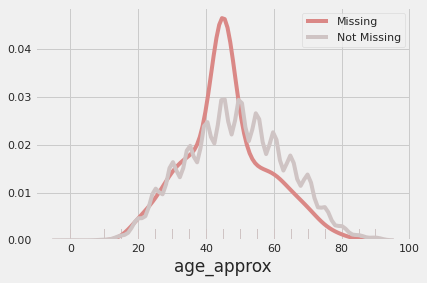

In [27]:
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
# f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.distplot(anatomy[anatomy['flag'] == 'missing']['age_approx'], 
             hist=False, rug=True, label='Missing', 
             color=colors_nude[2], kde_kws=dict(linewidth=4))
sns.distplot(anatomy[anatomy['flag'] == 'not_missing']['age_approx'], 
             hist=False, rug=True, label='Not Missing', 
             color=colors_nude[3], kde_kws=dict(linewidth=4))